In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv('credit_card_data.csv')
df.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0


In [5]:
df_date = pd.read_csv('credit_card_data(+date).csv')
df_date.head(1)

,pop_cd,year,month,year_month,avg_score,avg_rat,city,sex,ages,population,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,201601,812,2,서울,NaN,10대,55000,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0


In [6]:
# 경기동행지수 # coincident composite index
cci = pd.read_csv('경기동행지수_월별.csv')
cci = cci.drop(['year','month'],axis=1)
cci.head()

,year_month,cci
0,201601,100.1
1,201602,99.9
2,201603,99.8
3,201604,99.7
4,201605,99.9


In [7]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df_date[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [7]:
# data_by_seoul = data_by_loc[data_by_loc.city=='서울']
# data_by_incheon = data_by_loc[data_by_loc.city=='인천']
# data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
# data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [8]:
# data_by_10s = data_by_loc[data_by_loc.ages=='10대']
# data_by_20s = data_by_loc[data_by_loc.ages=='20대']
# data_by_30s = data_by_loc[data_by_loc.ages=='30대']
# data_by_40s = data_by_loc[data_by_loc.ages=='40대']
# data_by_50s = data_by_loc[data_by_loc.ages=='50대']
# data_by_60s = data_by_loc[data_by_loc.ages=='60대']
# data_by_70s = data_by_loc[data_by_loc.ages=='70대']
# data_by_80s = data_by_loc[data_by_loc.ages=='80대']
# data_by_90s = data_by_loc[data_by_loc.ages=='90대']

In [9]:
# data_by_16_1Q = data_by_loc[ (data_by_loc.year==2016) & (data_by_loc.month>=1) & (data_by_loc.month<=3)]
# data_by_16_2Q = data_by_loc[ (data_by_loc.year==2016) & (data_by_loc.month>=4) & (data_by_loc.month<=6)]
# data_by_16_3Q = data_by_loc[ (data_by_loc.year==2016) & (data_by_loc.month>=7) & (data_by_loc.month<=9)]
# data_by_16_4Q = data_by_loc[ (data_by_loc.year==2016) & (data_by_loc.month>=10) & (data_by_loc.month<=12)]

In [8]:
df2 = pd.merge(data_by_loc,cci, on='year_month')
df2.head()

,pop_cd,year,month,year_month,avg_score,avg_rat,city,sex,ages,population,...,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,cci
0,L011,2016,1,201601,812,2,서울,NaN,10대,55000,...,0,0,1120000,8210000,78020000,92170000,87260000,0,0,100.1
1,L021,2016,1,201601,811,2,인천,NaN,10대,17000,...,0,0,0,130000,4840000,0,4970000,0,0,100.1
2,L031,2016,1,201601,810,2,대전,NaN,10대,16000,...,0,0,1380000,420000,7980000,0,9780000,0,0,100.1
3,L041,2016,1,201601,809,2,대구,NaN,10대,10000,...,0,0,1380000,840000,11130000,0,13350000,0,0,100.1
4,L051,2016,1,201601,809,2,광주,NaN,10대,14000,...,0,0,0,110000,24860000,890000,28410000,0,0,100.1


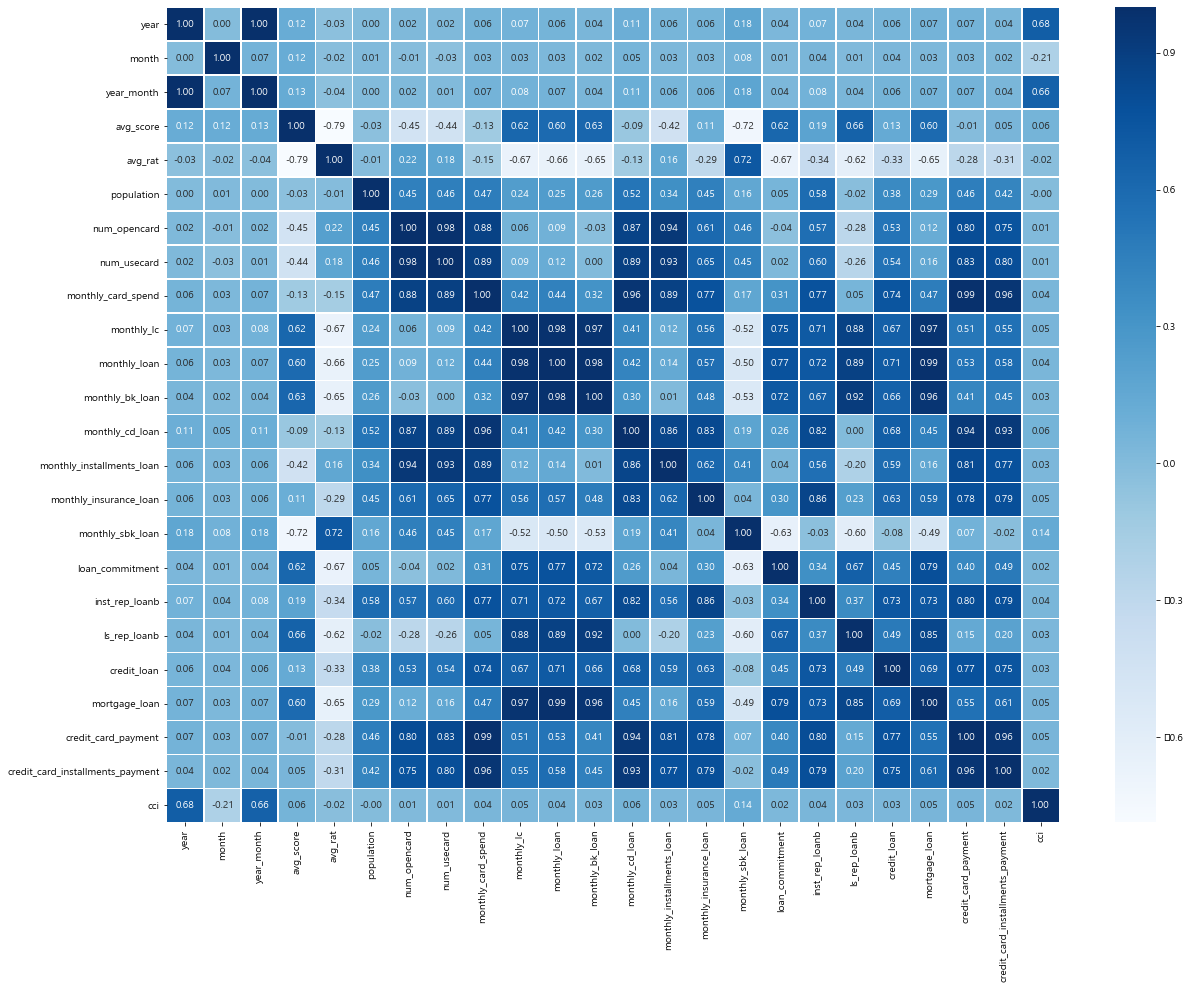

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df2.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')

In [13]:
data_by_loc.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment'],
      dtype='object')

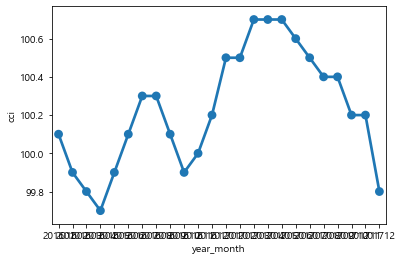

In [9]:
sns.pointplot(x='year_month', y='cci', data=cci)

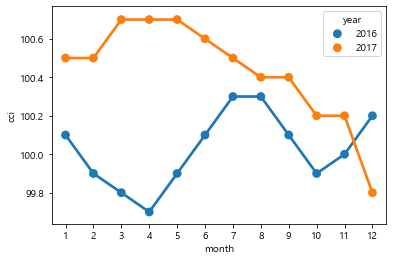

In [10]:
sns.pointplot(x='month', y='cci', hue='year',data=cci)

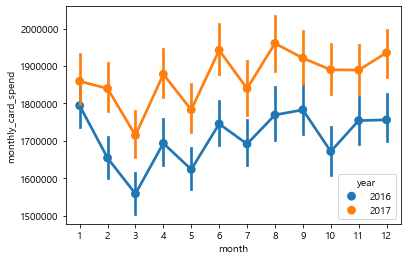

In [34]:
sns.pointplot(x='month', y='monthly_card_spend', hue='year',data=data_by_40s)

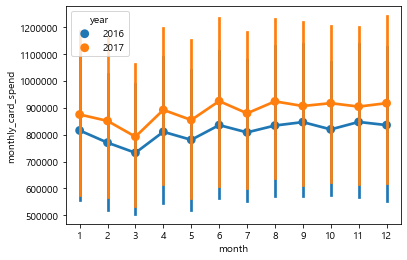

In [13]:
sns.pointplot(x='month', y='monthly_card_spend', hue='year',data=data_by_sex)

In [11]:
sns.pointplot(x='month', y='avg_score', data=data_by_40s, ax=ax)

NameError: name 'ax' is not defined

In [12]:
sns.pointplot(x='month', y='credit_loan', data=data_by_40s, ax=ax, hue='year')

NameError: name 'ax' is not defined

In [34]:
# df2['quarter'] = df2[ (df2.year==2016) & (df2.month>=1) & (df2.month<=3)]
# df2['quarter'] = df2[ (df2.year==2016) & (df2.month>=4) & (df2.month<=6)]
# data_by_16_3Q = df2[ (df2.year==2016) & (df2.month>=7) & (df2.month<=9)]
# data_by_16_4Q = df2[ (df2.year==2016) & (df2.month>=10) & (df2.month<=12)]

In [9]:
df2['quarter']=0

In [18]:
for i in range(len(df2)):
    if ((df2.year[i]==2016) & (df2.month[i]>=1) & (df2.month[i]<=3)):
        df2['quarter'][i]=201601
    elif ((df2.year[i]==2016) & (df2.month[i]>=4) & (df2.month[i]<=6)):
        df2['quarter'][i]=201602
    elif ((df2.year[i]==2016) & (df2.month[i]>=7) & (df2.month[i]<=9)):
        df2['quarter'][i]=201603
    elif ((df2.year[i]==2016) & (df2.month[i]>=10) & (df2.month[i]<=12)):
        df2['quarter'][i]=201604
    elif ((df2.year[i]==2017) & (df2.month[i]>=1) & (df2.month[i]<=3)):
        df2['quarter'][i]=201701
    elif ((df2.year[i]==2017) & (df2.month[i]>=4) & (df2.month[i]<=6)):
        df2['quarter'][i]=201702
    elif ((df2.year[i]==2017) & (df2.month[i]>=7) & (df2.month[i]<=9)):
        df2['quarter']=201703
    elif ((df2.year[i]==2017) & (df2.month[i]>=10) & (df2.month[i]<=12)):
        df2['quarter'][i]=201704

c:\users\kimjihyeon\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kimjihyeon\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\kimjihyeon\miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\kimjihyeon\miniconda3\lib\

In [19]:
df2

,pop_cd,year,month,year_month,avg_score,avg_rat,city,sex,ages,population,...,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,cci,quarter
0,L011,2016,1,201601,812,2,서울,NaN,10대,55000,...,0,1120000,8210000,78020000,92170000,87260000,0,0,100.1,201703
1,L021,2016,1,201601,811,2,인천,NaN,10대,17000,...,0,0,130000,4840000,0,4970000,0,0,100.1,201703
2,L031,2016,1,201601,810,2,대전,NaN,10대,16000,...,0,1380000,420000,7980000,0,9780000,0,0,100.1,201703
3,L041,2016,1,201601,809,2,대구,NaN,10대,10000,...,0,1380000,840000,11130000,0,13350000,0,0,100.1,201703
4,L051,2016,1,201601,809,2,광주,NaN,10대,14000,...,0,0,110000,24860000,890000,28410000,0,0,100.1,201703
5,L061,2016,1,201601,807,2,부산,NaN,10대,14000,...,0,0,0,5410000,0,5410000,0,0,100.1,201703
6,L071,2016,1,201601,813,2,울산,NaN,10대,12000,...,0,0,0,4790000,0,4790000,0,0,100.1,201703
7,L081,2016,1,201601,813,2,경기,NaN,10대,102000,...,0,110000,610000,14840000,0,15550000,0,0,100.1,201703
8,L091,2016,1,201601,816,2,강원,NaN,10대,20000,...,0,0,0,7820000,0,7820000,0,0,100.1,201703
9,L101,2016,1,201601,815,2,충북,NaN,10대,12000,...,0,0,950000,3760000,0,5130000,0,0,100.1,201703


In [26]:
gdp = pd.read_csv('gdp.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2
